# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: Based on admissions data from UCLA, [details as to data collection method and timing are unknown], determine if there is a relationship between a student's graduate school admission status and their GRE score, their undergraduate GPA and the relative prestige level of their undergraduate school.


### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: 

### Demo: Provide a table that explains the data by admission status

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | mean(std)  | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

In [41]:
pd.show_versions(as_json=False)


INSTALLED VERSIONS
------------------
commit: None
python: 2.7.13.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.19.2
nose: 1.3.7
pip: 9.0.1
setuptools: 27.2.0
Cython: 0.25.2
numpy: 1.11.3
scipy: 0.18.1
statsmodels: 0.6.1
xarray: None
IPython: 5.1.0
sphinx: 1.5.1
patsy: 0.4.1
dateutil: 2.6.0
pytz: 2016.10
blosc: None
bottleneck: 1.2.0
tables: 3.2.2
numexpr: 2.6.1
matplotlib: 2.0.0
openpyxl: 2.4.1
xlrd: 1.0.0
xlwt: 1.2.0
xlsxwriter: 0.9.6
lxml: 3.7.2
bs4: 4.5.3
html5lib: None
httplib2: None
apiclient: None
sqlalchemy: 1.1.5
pymysql: None
psycopg2: None
jinja2: 2.9.4
boto: 2.45.0
pandas_datareader: None


In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [4]:
print df_raw.describe()

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


In [5]:
df_no_missing = df_raw.dropna()
df_no_missing.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [6]:
df_no_missing.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [7]:
null_data = df_raw[df_raw.isnull().any(axis=1)]
null_data

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


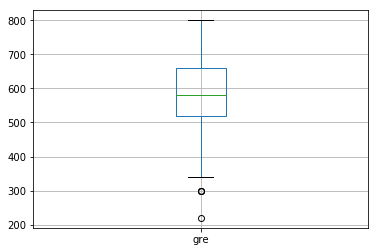

In [8]:
#boxplot GRE
df_no_missing.boxplot(column='gre')

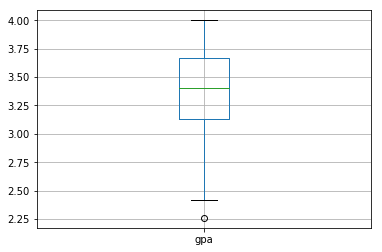

In [9]:
#boxplot GPA
df_no_missing.boxplot(column='gpa')

In [13]:
#get_dummies
#pandas.get_dummies(data, prefix=None, prefix_sep=’_’, dummy_na=False, columns='prestige', sparse=False, drop_first=False)

prestige_ranks = pd.get_dummies(df_no_missing['prestige'],prefix = 'prestige', columns='prestige')

prestige_ranks.head()


,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [16]:
clean_data = df_no_missing[['admit','gre','gpa']]

final_data = clean_data.join(prestige_ranks)

final_data.head()


,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1


In [43]:
# cross tab with admit columns and rows for GRE, GPA and each prestige level
#pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, 
#margins=False, dropna=True, normalize=False)[source]


pd.crosstab(index,clean_data.admit)




NameError: name 'index' is not defined

### Methods: Write up the methods used in your analysis

Answer:

### Results: Write up your results

Answer:

### Visuals: Provide a table or visualization of these results

<img src='placeholder.png' height= 25% width= 25%>

<img src='placeholder.png' height= 25% width= 25%>

### Discussion: Write up your discussion and future steps

Answer: 